# Importing the Libraries to be used

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the Data

In [61]:
df = pd.read_csv("http://bit.ly/DSCoreAutolibDataset")

Checking the data

In [62]:
#Checking the head of our dataset
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [63]:
#Checking the tail of our dataset
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [64]:
#Checking the number of rows and columns
df.shape

(16085, 13)

In [65]:
#Checking the data types in our dataset
df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

# Tidying the Dataset

In [66]:
#Dropping unnecessary columns
df.drop(['Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum', 'Slots_freed_sum', 'Slots_taken_sum', 'n_daily_data_points'], axis=1, inplace=True)

In [67]:
#Previewing out dataset to see whether they were dropped
df.head()

,Postal code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,1/1/2018,0,weekday,110,103
1,75001,1/2/2018,1,weekday,98,94
2,75001,1/3/2018,2,weekday,138,139
3,75001,1/4/2018,3,weekday,104,104
4,75001,1/5/2018,4,weekday,114,117


In [68]:
#Renaming the remaining columns
df = df.rename(columns={'Postal code': 'postal_code', 'dayOfWeek': 'week_day', 'BlueCars_taken_sum': 'bluecars_taken_sum', 'BlueCars_returned_sum': 'bluecars_returned_sum'})
df.head()

,postal_code,date,week_day,day_type,bluecars_taken_sum,bluecars_returned_sum
0,75001,1/1/2018,0,weekday,110,103
1,75001,1/2/2018,1,weekday,98,94
2,75001,1/3/2018,2,weekday,138,139
3,75001,1/4/2018,3,weekday,104,104
4,75001,1/5/2018,4,weekday,114,117


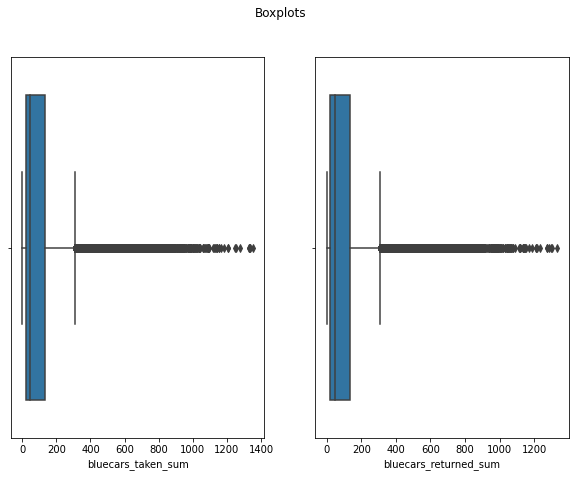

In [69]:
# Checking for Outliers
fig, ((ax1), (ax2)) = plt.subplots(1,2, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(df['bluecars_taken_sum'], ax=ax1)
sns.boxplot(df['bluecars_returned_sum'], ax=ax2)

plt.show()

In [70]:
#Removing the outliers
#If you remove outiers, you can check if it was the right thing to do by .skew()

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
DF = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df.shape)
print(DF.shape)


(16085, 6)
(12020, 6)


In [71]:
#Checking if we made the right decision by removing the outliers
#If the answer is a positive then it was definitely a good decision
DF.skew()

postal_code              0.629778
week_day                 0.022194
bluecars_taken_sum       1.901044
bluecars_returned_sum    1.905661
dtype: float64

In [72]:
# Checking for Anomalies
#
q1_bct = df['bluecars_taken_sum'].quantile(.25)
q3_bct = df['bluecars_taken_sum'].quantile(.75)

iqr_bct = q3_bct - q1_bct


q1_bcr = df['bluecars_returned_sum'].quantile(.25)
q3_bcr = df['bluecars_returned_sum'].quantile(.75)

iqr_bcr = q3_bcr - q1_bcr

print(iqr_bct, iqr_bcr)


115.0 115.0


In [74]:
#Identifying missing data
DF.isnull().sum()

postal_code              0
date                     0
week_day                 0
day_type                 0
bluecars_taken_sum       0
bluecars_returned_sum    0
dtype: int64

# Exploratory Analysis

**Univariate Analysis**

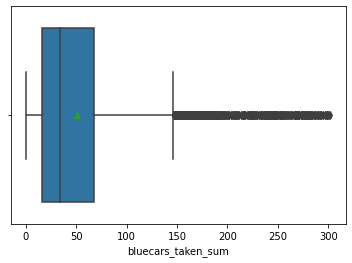

In [75]:
#Plotting a boxplot
#This shows us several factors including the quartiles, outliers and what their values are.
# It also shows you if your data is symmetrical, 
# how tightly your data is grouped, and if and how your data is skewed.
sns.boxplot(DF["bluecars_taken_sum"], showmeans=True)

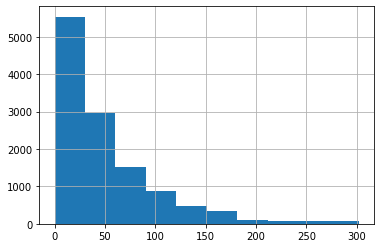

In [76]:
#Plot a histogram
DF['bluecars_taken_sum'].hist()

In [77]:
DF['bluecars_taken_sum'].mean()

50.77296173044925

The mean of the bluecars taken is 50.7 rounded off to 51. This means that on average, 51 blue cars are hired daily.

In [78]:
DF['bluecars_taken_sum'].median()

34.0

In [79]:
DF['bluecars_taken_sum'].std()

49.9010881304429

In [80]:
DF['bluecars_taken_sum'].quantile([0.25,0.5,0.75])

0.25    16.0
0.50    34.0
0.75    68.0
Name: bluecars_taken_sum, dtype: float64

In [81]:
DF['bluecars_taken_sum'].skew()

1.90104407989754

In [82]:
DF['bluecars_taken_sum'].kurt()

4.321198853134719

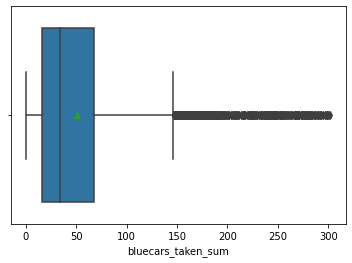

In [83]:
#Plotting a boxplot
#This will check for normality and skewness
sns.boxplot(DF["bluecars_taken_sum"], showmeans=True)

In [84]:
DF['postal_code'].value_counts()

94130    156
94340    156
94150    156
93350    156
93310    156
        ... 
92340    147
92130    133
93200    126
93390     84
92100     15
Name: postal_code, Length: 79, dtype: int64

Text(0, 0.5, 'Count')

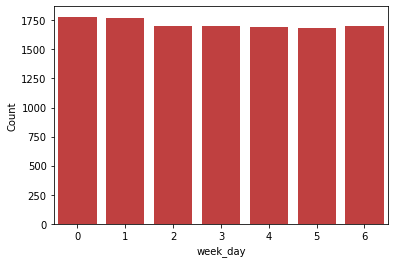

In [85]:
##Categorical Variables
# Creating Frequency table of the columns
sns.countplot(DF['week_day'], color='red',saturation=0.5)
plt.xlabel('week_day')
plt.ylabel('Count')

In [86]:
DF['week_day'].value_counts()

0    1780
1    1769
6    1697
3    1697
2    1697
4    1696
5    1684
Name: week_day, dtype: int64

**Bivariate Analysis**

In [87]:
df1 = DF[['week_day', 'bluecars_taken_sum']]
df1.head()

,week_day,bluecars_taken_sum
3899,0,19
3900,1,10
3901,2,11
3902,3,5
3903,4,10


In [88]:
df1.corr()

,week_day,bluecars_taken_sum
week_day,1.000000,0.109781
bluecars_taken_sum,0.109781,1.000000


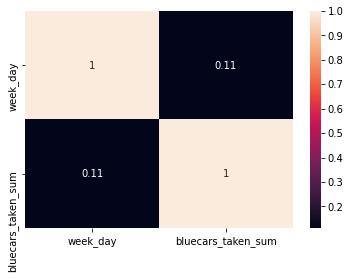

In [89]:
sns.heatmap(df1.corr(),annot=True)
plt.show()

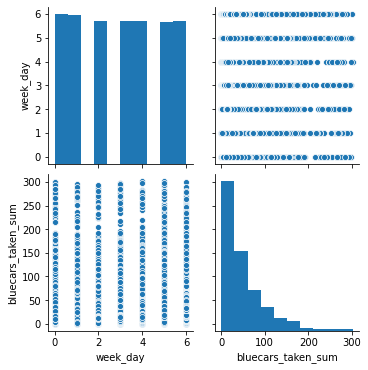

In [90]:
sns.pairplot(df1)
plt.show()

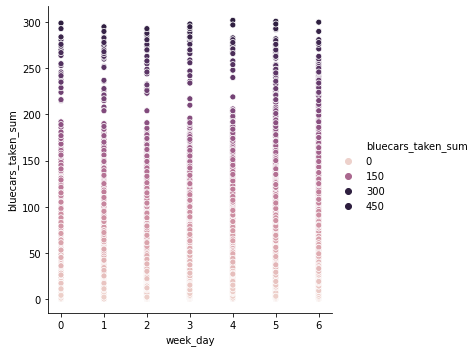

In [91]:
sns.relplot(x = 'week_day', y  = 'bluecars_taken_sum', hue = 'bluecars_taken_sum',data=df1)

In [93]:
df1.groupby('week_day')['bluecars_taken_sum'].value_counts()

week_day  bluecars_taken_sum
0         12                    44
          11                    41
          17                    40
          9                     39
          7                     37
                                ..
6         276                    1
          278                    1
          281                    1
          290                    1
          300                    1
Name: bluecars_taken_sum, Length: 1459, dtype: int64

In [94]:
df1.groupby('bluecars_taken_sum')['week_day'].value_counts()

bluecars_taken_sum  week_day
0                   1           14
                    5           13
                    0            8
                    3            8
                    2            6
                                ..
298                 5            1
299                 0            2
300                 6            1
301                 5            1
302                 4            1
Name: week_day, Length: 1459, dtype: int64

In [95]:
#Since I only want to use the weekdays and bluecars taken column, I select them
New_df = DF.loc[:,["week_day", "bluecars_taken_sum"]]
New_df

,week_day,bluecars_taken_sum
3899,0,19
3900,1,10
3901,2,11
3902,3,5
3903,4,10
...,...,...
16080,4,15
16081,5,19
16082,6,33
16083,0,11


In [96]:
#I also select the dataset with tuesdays obly
Tuesdays = New_df.loc[New_df['week_day'] == 1]
Tuesdays

,week_day,bluecars_taken_sum
3900,1,10
3907,1,3
3914,1,9
3921,1,4
3928,1,7
...,...,...
16056,1,7
16063,1,11
16070,1,4
16077,1,25


In [97]:
strat_output1 = Tuesdays.groupby('week_day', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))
# proportion of the non_stratified sample
print(strat_output1['week_day'].value_counts())
# Check the stratified output
print(strat_output1)

1    177
Name: week_day, dtype: int64
       week_day  bluecars_taken_sum
6883          1                  28
13842         1                  45
12065         1                 101
5050          1                 270
12670         1                  36
...         ...                 ...
11811         1                   3
13761         1                  45
9656          1                  81
12358         1                  36
13633         1                  29

[177 rows x 2 columns]


In [98]:
#Selecting the dataset with Fridays only
Fridays = New_df.loc[New_df['week_day'] == 4]
Fridays

,week_day,bluecars_taken_sum
3903,4,10
3910,4,16
3917,4,11
3924,4,10
3931,4,8
...,...,...
16049,4,19
16059,4,9
16066,4,8
16073,4,11


In [99]:
strat_output2 = Fridays.groupby('week_day', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))
# proportion of the non_stratified sample
print(strat_output2['week_day'].value_counts())
# Check the stratified output
print(strat_output2)

4    170
Name: week_day, dtype: int64
       week_day  bluecars_taken_sum
7049          4                  20
9577          4                 171
4911          4                 108
9882          4                 104
15269         4                  28
...         ...                 ...
6886          4                  29
11250         4                   9
8132          4                  19
4932          4                  89
10176         4                  28

[170 rows x 2 columns]


# Simple Random Sample

In [100]:
Tue_sample = Tuesdays.sample(n=122, replace=False)
print(Tue_sample)

       week_day  bluecars_taken_sum
7276          1                  12
12640         1                  17
8512          1                  29
9379          1                 133
13761         1                  45
...         ...                 ...
13159         1                   2
5442          1                 154
13952         1                  16
4936          1                  83
4307          1                   6

[122 rows x 2 columns]


In [101]:
#Confidence 
from scipy.stats import norm
Tues_sample = norm.fit(Tue_sample)
Tues_sample

(21.770491803278688, 40.391584678901665)

In [102]:
sample_1 = Tue_sample.loc[(Tue_sample['bluecars_taken_sum']> Tues_sample[0]) & (Tue_sample['bluecars_taken_sum']< Tues_sample[1])]
sample_1

,week_day,bluecars_taken_sum
8512,1,29
12952,1,22
16077,1,25
14785,1,29
7181,1,28
15823,1,29
13412,1,34
14562,1,38
10720,1,25
14385,1,32


In [103]:
Frid_sample = Fridays.sample(n=170, replace=False)
print(Frid_sample)

       week_day  bluecars_taken_sum
11441         4                  18
7442          4                 204
14483         4                  22
7829          4                  43
15560         4                  78
...         ...                 ...
15591         4                  91
9013          4                 131
15674         4                  23
12931         4                  28
4946          4                  81

[170 rows x 2 columns]


In [104]:
from scipy.stats import norm
Fri_sample = norm.fit(Frid_sample)
Fri_sample

(30.53235294117647, 49.071036267293366)

In [105]:
sample_2 = Frid_sample.loc[(Frid_sample['bluecars_taken_sum']> Fri_sample[0]) & (Frid_sample['bluecars_taken_sum']< Fri_sample[1])]
sample_2

,week_day,bluecars_taken_sum
7829,4,43
7808,4,41
12368,4,37
12442,4,38
10201,4,31
5587,4,37
13408,4,41
13675,4,40
5929,4,45
6357,4,39


# Normality Test

In [106]:
# imporing the shapiro function
from scipy.stats import shapiro 

# testing for normality
stat, p = shapiro(sample_1.bluecars_taken_sum)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.899, p=0.029
Sample does not look Gaussian


In [107]:
# imporing the shapiro function
from scipy.stats import shapiro 

# testing for normality
stat, p = shapiro(sample_2.bluecars_taken_sum)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.954, p=0.432
Sample looks Gaussian


# Implementing the Solution

In [108]:
print(sample_1.shape)
print(sample_2.shape)

(22, 2)
(20, 2)


In [109]:
#At this step, we now implement the solution by performing hypothesis testing
#The assumptions met to compute a ttest are met i.e normal distribution, sample size of less than 30
from scipy.stats import ttest_ind
# seed the random number generator

# compare samples
#stat, p = ttest_ind(Tue_sample, Wed_sample)
#print('t=%.3f, p=%.3f' % (stat, p))

#ttest,pval = ttest_ind(Tue_sample,Wed_sample)
#print(pval)

In [110]:
#At this step, we now implement the solution by performing hypothesis testing
from scipy import stats
from scipy.stats import ttest_ind
stat,p_value = stats.ttest_ind(a=sample_1.bluecars_taken_sum,b=sample_2.bluecars_taken_sum,equal_var=False)
stat,p_value

(-6.728488515660676, 4.595919936451172e-08)

In [111]:
if p_value < 0.05:
  print("We're rejecting the null hypothesis")
else:
  print("We fail to reject null hypothesis")

We're rejecting the null hypothesis


In [112]:
#Point estimate 1
# = pop.mean() - sample_age.mean()
pop_mean = DF['bluecars_taken_sum'].mean()
sample1_mean = sample_1['bluecars_taken_sum'].mean()
print(pop_mean - sample1_mean)

21.682052639540164


In [113]:
#Point estimate 2
sample2_mean = sample_2['bluecars_taken_sum'].mean()
print(pop_mean - sample2_mean)

10.972961730449256


In [114]:
pop_mean

50.77296173044925

In [115]:
sample_1.std()

week_day              0.00000
bluecars_taken_sum    5.58833
dtype: float64

In [116]:
sample_2.std()

week_day              0.0000
bluecars_taken_sum    4.7195
dtype: float64